In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Read dataset. Data available at "https://www.kaggle.com/datasets/shivachandel/kc-house-data"
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Some important details
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

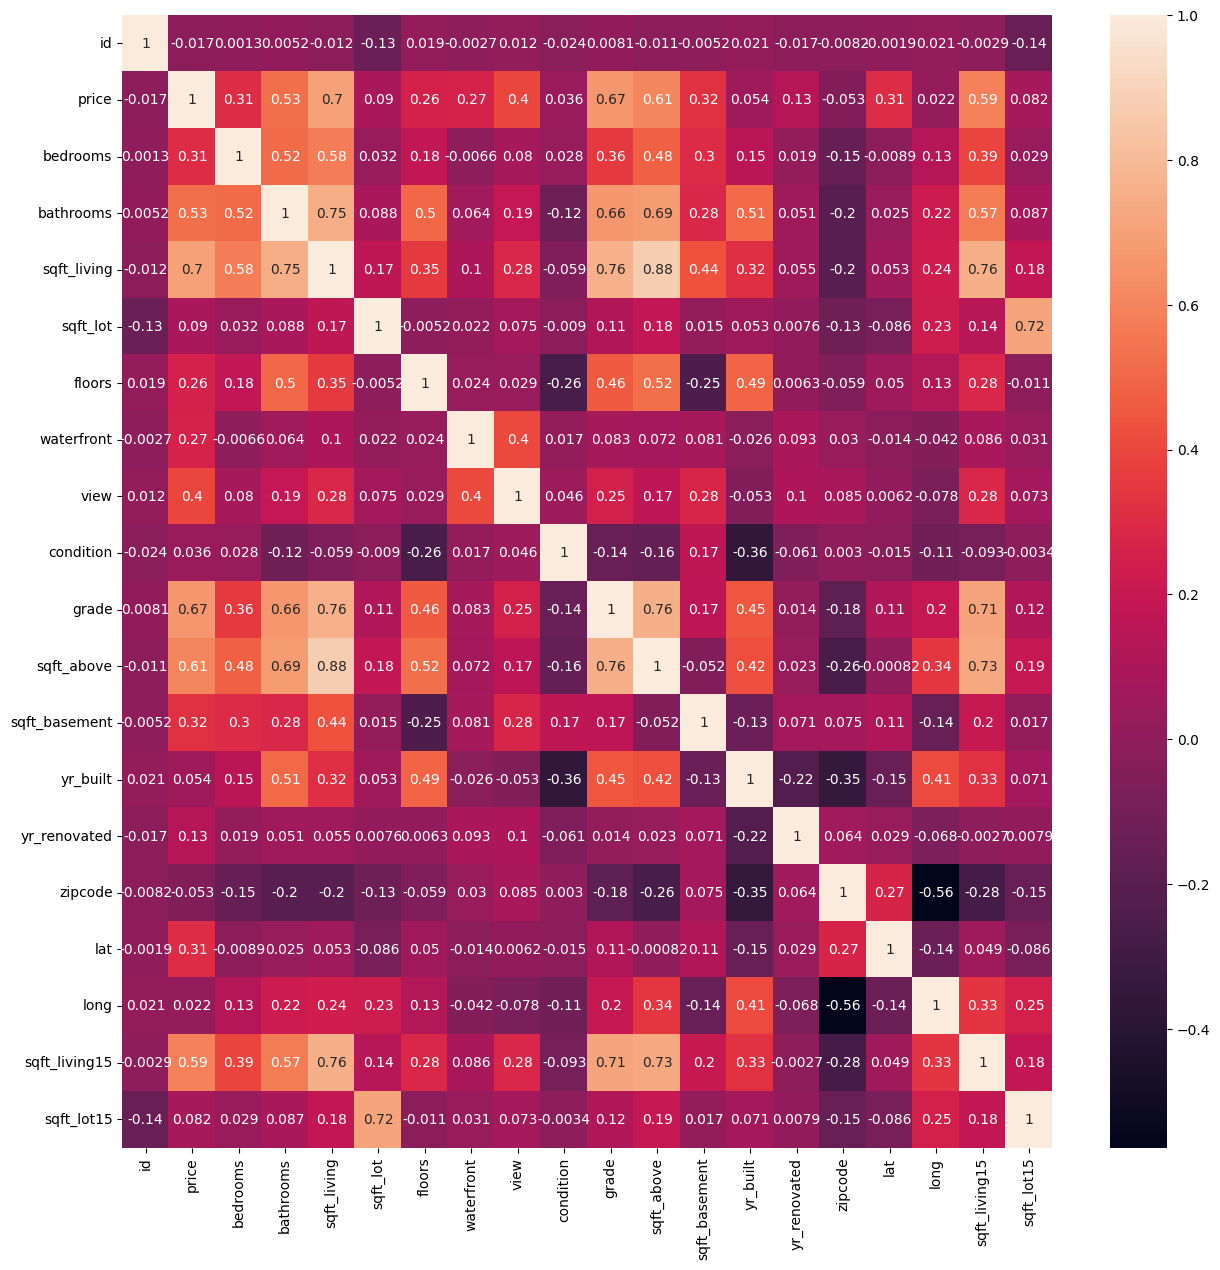

In [ ]:
#Correlation between variables
correlations = houses.corr()
plt.figure(figsize=(15,15),dpi=100)
sns.heatmap(correlations, annot=True)

Text(0, 0.5, 'House Price (in millions)')

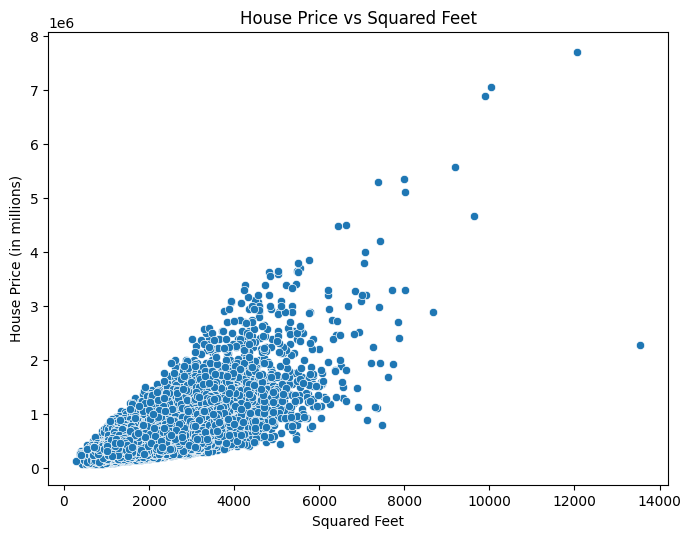

In [ ]:
#Scatter plot between most correlated feature and target variable
plt.figure(figsize=(8,6),dpi=100)

sns.scatterplot(x='sqft_living', y='price', data=houses)

plt.title("House Price vs Squared Feet")
plt.xlabel("Squared Feet")
plt.ylabel("House Price (in millions)")

In [ ]:
#Using just one feature to predict price
X = houses[['sqft_living']]

#Target
Y = houses['price']

#Split data between training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

-45843.20139357727
[282.0154968]


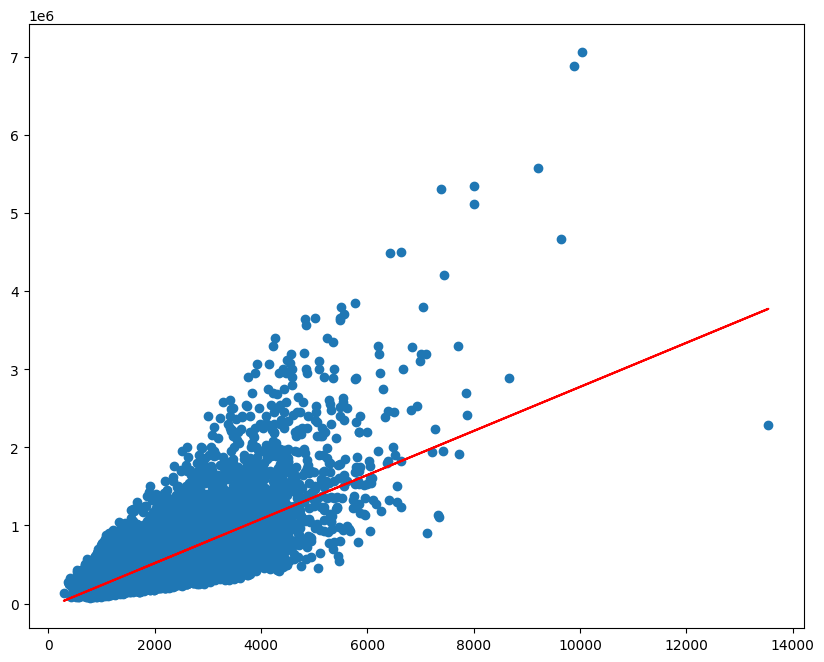

In [ ]:
#Import linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

#Train the model
lr.fit(x_train, y_train)

#Print learned parameters
print(lr.intercept_) 
print(lr.coef_) 

#Draw the learned regression line through the data
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(x_train, y_train)
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, '-r')

In [ ]:
#Predict the price for a test case
lr.predict([[4600]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1251428.08388372])

In [ ]:
from sklearn.metrics import mean_squared_error

#Perform prediction for test set
y_pred = lr.predict(x_test)

#Calculate and print RMSE value
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error: ' + str(rmse))

Root Mean Squared Error: 261685.63096805674


In [ ]:
from sklearn.metrics import mean_absolute_error

#Calculate and print MAE value
mae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error: ' + str(mae))

Mean Absolute Error: 176014.91429324957
